In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

### Data to be analyzed has been imported 

In [2]:
data=pd.read_excel(r'C:\Users\hp user\Downloads\Assignment_2_Statistics\StatisticalAnalysisDataset.xlsx')

In [3]:
data.head()

,number,priority,state,Ticket_class_name,MTTR,u_preferred_method_of_contact
0,INC0586211,3 - Moderate,Closed,Incident,114,Instant Message
1,INC0586189,4 - Low,New,Incident,0,Email
2,INC0586151,3 - Moderate,Closed,Incident,1694,Phone
3,INC0586145,4 - Low,Closed,Incident,220,Phone
4,INC0586144,4 - Low,Closed,Incident,67,Phone


In [4]:
data.dtypes

number                           object
priority                         object
state                            object
Ticket_class_name                object
MTTR                              int64
u_preferred_method_of_contact    object
dtype: object

In [5]:
data.isnull().sum()

number                           0
priority                         0
state                            0
Ticket_class_name                0
MTTR                             0
u_preferred_method_of_contact    0
dtype: int64

In [6]:
data.columns

Index(['number', 'priority', 'state', 'Ticket_class_name', 'MTTR',
       'u_preferred_method_of_contact'],
      dtype='object')

In [7]:
data.shape

(33984, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   number                         33984 non-null  object
 1   priority                       33984 non-null  object
 2   state                          33984 non-null  object
 3   Ticket_class_name              33984 non-null  object
 4   MTTR                           33984 non-null  int64 
 5   u_preferred_method_of_contact  33984 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [9]:
data.describe()

,MTTR
count,3.398400e+04
mean,1.949719e+04
std,1.279956e+05
min,0.000000e+00
25%,4.100000e+01
50%,1.880000e+02
75%,1.891250e+03
max,1.381603e+07


### statistical analysis LEVEL 1
(mean&median MTTR)

In [10]:
np.mean(data['MTTR'])

19497.185969868173

In [11]:
np.median(data['MTTR'])

188.0

### frequency distribution based on priority of tickets

In [12]:
data_priority=data['priority'].value_counts()

In [13]:
data_priority

4 - Low              31409
3 - Moderate          2306
5 - Scheduled SLA      217
2 - High                48
1 - Critical             4
Name: priority, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

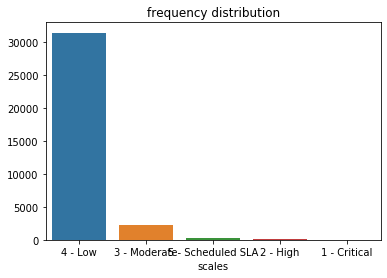

In [14]:
sns.barplot(data_priority.index,data_priority.values)
plt.title('frequency distribution')
plt.xlabel('scales')
plt.show

### to find mean and median MTTR based on priority of tickets,we have to group MTTR (column) based on priority of tickets

In [15]:
data1=data.groupby('priority')['MTTR']

In [16]:
data1.mean()

priority
1 - Critical           6655.750000
2 - High               4097.687500
3 - Moderate          28361.825239
4 - Low               15959.263300
5 - Scheduled SLA    441023.898618
Name: MTTR, dtype: float64

In [17]:
data1.median()

priority
1 - Critical           7086.0
2 - High               2712.5
3 - Moderate           3011.0
4 - Low                 152.0
5 - Scheduled SLA    337135.0
Name: MTTR, dtype: float64

### Min & Max MTTR based on ticket priority

In [18]:
data1.min()

priority
1 - Critical         3803
2 - High              156
3 - Moderate            0
4 - Low                 0
5 - Scheduled SLA      49
Name: MTTR, dtype: int64

In [19]:
data1.max()

priority
1 - Critical             8648
2 - High                21372
3 - Moderate          1914938
4 - Low               8559618
5 - Scheduled SLA    13816027
Name: MTTR, dtype: int64

### LEVEL 2  (quartiles based on priority of tickets)  Q1=0.25,Q2=0.50,Q3=0.75

In [20]:
data1.quantile([0.25,0.5,0.75])

priority               
1 - Critical       0.25      5093.75
                   0.50      7086.00
                   0.75      8648.00
2 - High           0.25      1658.75
                   0.50      2712.50
                   0.75      4901.75
3 - Moderate       0.25       853.50
                   0.50      3011.00
                   0.75     12309.00
4 - Low            0.25        37.00
                   0.50       152.00
                   0.75      1315.00
5 - Scheduled SLA  0.25     84834.00
                   0.50    337135.00
                   0.75    507339.00
Name: MTTR, dtype: float64

## Dividing data into 10 groups based on MTTR

In [21]:
data_decile=pd.qcut(data['MTTR'],10)

In [22]:
data_decile

0                (98.0, 188.0]
1               (-0.001, 19.0]
2             (1109.0, 3389.4]
3               (188.0, 424.8]
4                 (54.0, 98.0]
                 ...          
33979             (19.0, 31.0]
33980    (18161.5, 13816027.0]
33981         (1109.0, 3389.4]
33982             (31.0, 54.0]
33983        (3389.4, 18161.5]
Name: MTTR, Length: 33984, dtype: category
Categories (10, interval[float64]): [(-0.001, 19.0] < (19.0, 31.0] < (31.0, 54.0] < (54.0, 98.0] ... (424.8, 1109.0] < (1109.0, 3389.4] < (3389.4, 18161.5] < (18161.5, 13816027.0]]

### IQR=Q3-Q1

In [23]:
IQR=data1.quantile(0.75)-data1.quantile(0.25)

In [24]:
IQR

priority
1 - Critical           3554.25
2 - High               3243.00
3 - Moderate          11455.50
4 - Low                1278.00
5 - Scheduled SLA    422505.00
Name: MTTR, dtype: float64

In [25]:
Q3=data1.quantile(0.75)

In [26]:
Q1=data1.quantile(0.25)

In [27]:
    max= Q3+(IQR*1.5)
    min=Q1-(IQR*1.5)

In [28]:
max

priority
1 - Critical           13979.375
2 - High                9766.250
3 - Moderate           29492.250
4 - Low                 3232.000
5 - Scheduled SLA    1141096.500
Name: MTTR, dtype: float64

In [29]:
min

priority
1 - Critical           -237.625
2 - High              -3205.750
3 - Moderate         -16329.750
4 - Low               -1880.000
5 - Scheduled SLA   -548923.500
Name: MTTR, dtype: float64

### Herebelow are outliers based on categories under priority
Z score was used to detect outliers

1.1 - Critical

In [30]:
data_critical=data[data['priority']=='1 - Critical']

In [31]:
data_critical

,number,priority,state,Ticket_class_name,MTTR,u_preferred_method_of_contact
2982,INC0570086,1 - Critical,Closed,Incident,5524,Email
9695,INC0534591,1 - Critical,Closed,Incident,3803,Phone
14658,INC0516087,1 - Critical,Closed,Incident,8648,Phone
18943,INC0516087,1 - Critical,Closed,Incident,8648,Phone


In [78]:
z1=np.abs(stats.zscore(data_critical['MTTR']))

In [79]:
z1

array([0.54330182, 1.36947581, 0.95638881, 0.95638881])

For 1- Critical, there are no outliers

In [80]:
threshold=3
print(np.where(z1>3))

(array([], dtype=int64),)


2.2- High

In [35]:
data_high=data[data['priority']=='2 - High'  ]

In [36]:
data_high.head()

,number,priority,state,Ticket_class_name,MTTR,u_preferred_method_of_contact
642,INC0583313,2 - High,Closed,Incident,1029,Email
1935,INC0576777,2 - High,Closed,Incident,1697,Email
4418,INC0559567,2 - High,Closed,Incident,2879,Email
5718,INC0550358,2 - High,Closed,Incident,1613,Email
5946,INC0549523,2 - High,Closed,Incident,4247,Phone


In [82]:
z2=np.abs(stats.zscore(data_high['MTTR']))

In [83]:
z2

array([0.70518984, 0.55168225, 0.28005655, 0.5709856 , 0.03431228,
       0.17457754, 0.83410864, 0.46863764, 0.55168225, 0.56009874,
       0.00590303, 0.4806735 , 0.22260611, 0.07820442, 0.39288923,
       0.65509305, 0.44083162, 0.07820442, 0.39288923, 0.65509305,
       0.44083162, 0.52433584, 0.40406334, 0.35658054, 0.4154098 ,
       0.18207482, 0.24972272, 3.96966771, 0.55696769, 0.06809314,
       0.1928755 , 0.12448075, 0.60430686, 0.48251192, 0.02819381,
       0.73276605, 1.06979909, 0.90580679, 0.56446498, 2.99645718,
       0.86490208, 0.45516551, 3.23223381, 0.77978924, 0.4666556 ,
       0.75827405, 0.75804425, 0.8030854 ])

Herebelow are outliers for 2- High

In [84]:
 #for z>3,outliers are dsplayed.for z<3, values in wanted range are displayed
threshold=3
print(np.where(z2>3))

(array([27, 42], dtype=int64),)


3.3- Moderate   

In [69]:
data_moderate=data[data['priority']=='3 - Moderate'  ]

In [85]:
data_moderate.head()

,number,priority,state,Ticket_class_name,MTTR,u_preferred_method_of_contact
0,INC0586211,3 - Moderate,Closed,Incident,114,Instant Message
2,INC0586151,3 - Moderate,Closed,Incident,1694,Phone
18,INC0586121,3 - Moderate,Closed,Incident,643,Email
20,INC0586119,3 - Moderate,Closed,Incident,657,Email
25,INC0586109,3 - Moderate,Closed,Incident,239,Phone


In [86]:
z3=np.abs(stats.zscore(data_moderate['MTTR']))

In [87]:
z3

array([0.33174949, 0.31319357, 0.32553678, ..., 1.19017596, 0.27777292,
       0.32705179])

herebelow are outliers for 3- Moderate

In [88]:
threshold=3
print(np.where(z3>3))

(array([ 150,  156,  212,  214,  223,  232,  278,  341,  424,  430,  435,
        464,  470,  472,  480,  544,  549,  648,  683,  745,  770,  885,
       1045, 1091, 1217, 1230, 1321, 1367, 1493, 1506, 1583, 1755, 1760,
       1817, 1870, 1963, 2076, 2096, 2115, 2153, 2174], dtype=int64),)


4.4- Low

In [89]:
data_low=data[data['priority']=='4 - Low'  ]

In [90]:
data_low.head()

,number,priority,state,Ticket_class_name,MTTR,u_preferred_method_of_contact
1,INC0586189,4 - Low,New,Incident,0,Email
3,INC0586145,4 - Low,Closed,Incident,220,Phone
4,INC0586144,4 - Low,Closed,Incident,67,Phone
5,INC0586143,4 - Low,Closed,Incident,706,Phone
6,INC0586142,4 - Low,Active,Incident,0,Instant Message


In [91]:
z4=np.abs(stats.zscore(data_low['MTTR']))

In [92]:
z4

array([0.16731383, 0.16500739, 0.16661141, ..., 0.1426664 , 0.16687351,
       0.10457873])

Herebelow are Outliers of 4- Low

In [93]:
threshold=3
print(np.where(z4>3))

(array([  617,   670,   716,   721,   730,   749,   755,   777,   784,
         818,   850,   888,   890,   891,   924,  1130,  1361,  1443,
        1630,  1695,  1726,  1889,  1966,  2015,  2023,  2049,  2094,
        2181,  2203,  2336,  2345,  2384,  2385,  2398,  2566,  2656,
        2662,  2667,  2680,  2681,  2698,  2729,  2733,  2777,  2835,
        2871,  2961,  2965,  3081,  3200,  3310,  3343,  3367,  3382,
        3386,  3387,  3403,  3432,  3500,  3514,  3540,  3578,  3595,
        3864,  4039,  4057,  4080,  4081,  4086,  4089,  4093,  4099,
        4130,  4194,  4388,  4531,  4628,  4646,  4660,  4665,  4682,
        4710,  4720,  4721,  4725,  4736,  4788,  4805,  4821,  4876,
        4881,  4949,  5153,  5168,  5214,  5237,  5247,  5282,  5324,
        5327,  5331,  5332,  5340,  5356,  5376,  5394,  5438,  5527,
        5604,  5893,  5934,  5950,  5998,  6005,  6033,  6104,  6239,
        6265,  6452,  6554,  6582,  6625,  6627,  6640,  6704,  6868,
        6934,  7086

5.5 - Scheduled SLA

In [94]:
data_scheduled=data[data['priority']=='5 - Scheduled SLA'  ]

In [98]:
data_scheduled.head()

,number,priority,state,Ticket_class_name,MTTR,u_preferred_method_of_contact
898,INC0582230,5 - Scheduled SLA,Closed,Incident,392911,Email
1384,INC0580008,5 - Scheduled SLA,Closed,Incident,187500,Email
1554,INC0578761,5 - Scheduled SLA,Closed,Incident,582459,Email
1600,INC0578571,5 - Scheduled SLA,Closed,Incident,337135,Phone
1742,INC0577890,5 - Scheduled SLA,Closed,Incident,252868,Email


In [100]:
z5=np.abs(stats.zscore(data_scheduled['MTTR']))

In [101]:
z5

array([4.83242663e-02, 2.54637670e-01, 1.42056449e-01, 1.04345299e-01,
       1.88982498e-01, 2.61768861e-01, 5.33645149e-02, 1.67224532e-01,
       1.93605720e-01, 7.82875268e-02, 1.63633827e-01, 8.89308774e-02,
       8.01094960e-02, 1.57930992e+00, 3.28110238e-01, 4.47355696e-02,
       4.24348978e-01, 2.38896020e-01, 7.64615400e-02, 2.21210665e-01,
       1.52729042e-02, 5.78673186e-01, 3.62227465e-01, 4.39720211e-01,
       7.20874078e-02, 1.57257735e-01, 1.76204812e-01, 6.42531411e-02,
       8.59932311e-02, 4.42795663e-01, 4.42543560e-01, 4.39490205e-01,
       4.42788632e-01, 4.41233831e-01, 4.41288069e-01, 1.47616769e-01,
       4.42835839e-01, 2.57021095e-01, 5.73708355e-02, 2.50300700e-01,
       9.01141646e-01, 4.40850153e-01, 4.42805707e-01, 1.65692629e-01,
       6.66064343e-02, 2.59441886e-01, 4.42608846e-01, 8.58766298e-01,
       1.67782859e-02, 7.00221718e-02, 1.56838903e-01, 4.42731382e-01,
       3.79880563e-02, 8.02380583e-02, 4.41699870e-01, 1.91710430e-01,
      

Herebelow are outliers for Scheduled SLA

In [102]:
threshold=3
print(np.where(z5>3))

(array([216], dtype=int64),)


### HYPOTHESIS TESTING

In [103]:
m1=data_high.mean()-data_critical.mean()

In [104]:
m1

MTTR   -2558.0625
dtype: float64

In [105]:
m2=data_moderate.mean()-data_low.mean()

In [106]:
m2

MTTR    12402.561938
dtype: float64

In [107]:
ttest,pval=stats.ttest_rel((data_high.mean()-data_critical.mean()),data_moderate.mean()-data_low.mean())
print(pval)
if pval<0.05:
    print('reject null hypothesis')
else:
    print(" fail to reject null hypothesis")

nan
 fail to reject null hypothesis


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [108]:
ttest,pval=stats.ttest_rel(m1,m2)
print(pval)
if pval<0.05:
    print('reject null hypothesis')
else:
    print(" fail to reject null hypothesis")

nan
 fail to reject null hypothesis
